In [60]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [72]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

In [73]:
csv_dir = "data/"
csv_files = glob.glob(os.path.join(csv_dir, "*.csv"))

In [74]:
dfs = [pd.read_csv(f) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)

In [102]:
df['soa_offset'] = round((df['soa_ms'] - df['threshold']) / 7)

In [75]:
df.head()

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,threshold
0,Alex,0,69.575979,False,False,1,49.0
1,Alex,1,55.660783,False,True,3,49.0
2,Alex,2,55.660783,False,True,4,49.0
3,Alex,3,34.787990,False,False,2,49.0
4,Alex,4,76.533577,False,True,4,49.0


In [30]:
fpr = (
    df[df['catch_trial']]
    .groupby('subj')['detect_yn']
    .mean()
    .reset_index(name='false_positive_rate')
)

In [57]:
print(fpr.to_string(index=False))

   subj  false_positive_rate
   Alex             0.000000
   Anna             0.027778
Atharva             0.111111
 Brenna             0.055556
  Caleb             0.000000
  Kevin             0.222222
Kevin_F             0.111111
Madison             0.000000
Michael             0.555556
 Neehar             0.333333
  Raphi             0.222222
Rogerio             0.027778
  Sevan             0.000000
Suzanne             0.222222
     qw             0.277778


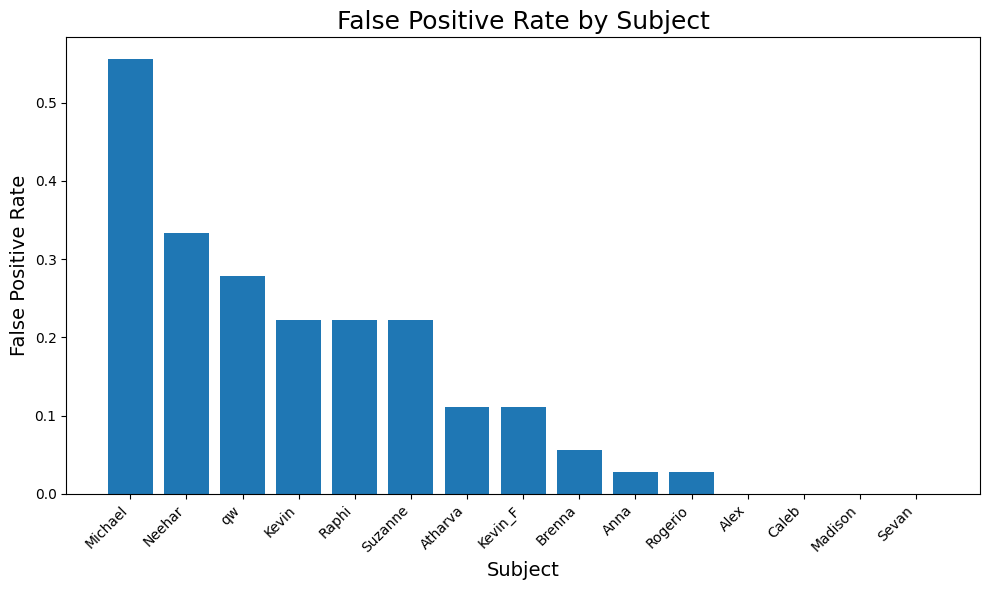

In [69]:
df_sorted = fpr.sort_values('false_positive_rate', ascending=False)
    
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['subj'], df_sorted['false_positive_rate'])
plt.xlabel('Subject', fontsize=14)
plt.ylabel('False Positive Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('False Positive Rate by Subject', fontsize=18)
plt.tight_layout()
plt.show()

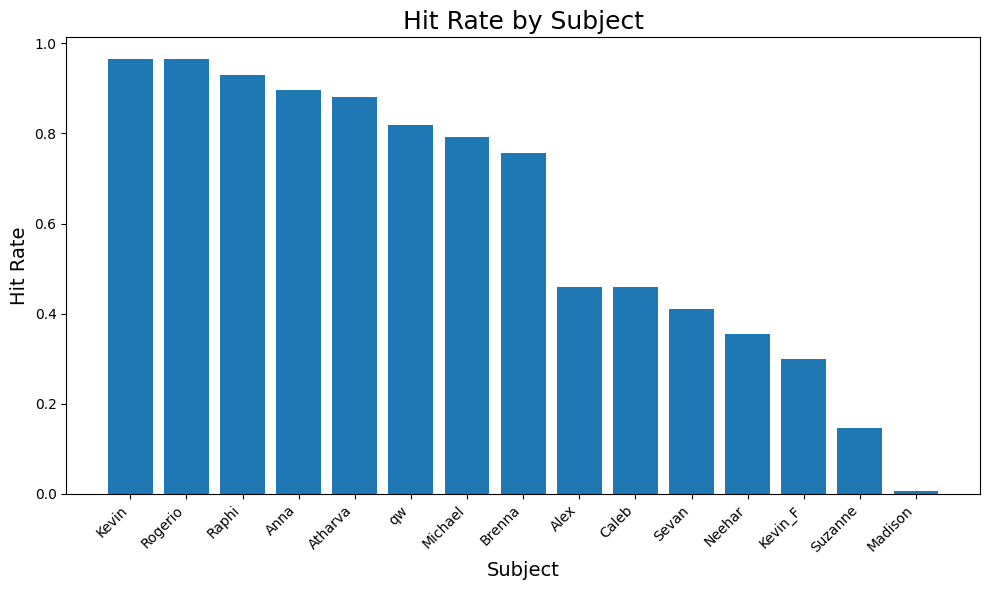

In [78]:
hr = (
    df[~df['catch_trial']]
    .groupby('subj')['detect_yn']
    .mean()
    .reset_index(name='hit_rate')
)

df_sorted = hr.sort_values('hit_rate', ascending=False)
    
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['subj'], df_sorted['hit_rate'])
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Hit Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Hit Rate by Subject', fontsize=18)
plt.tight_layout()
plt.show()

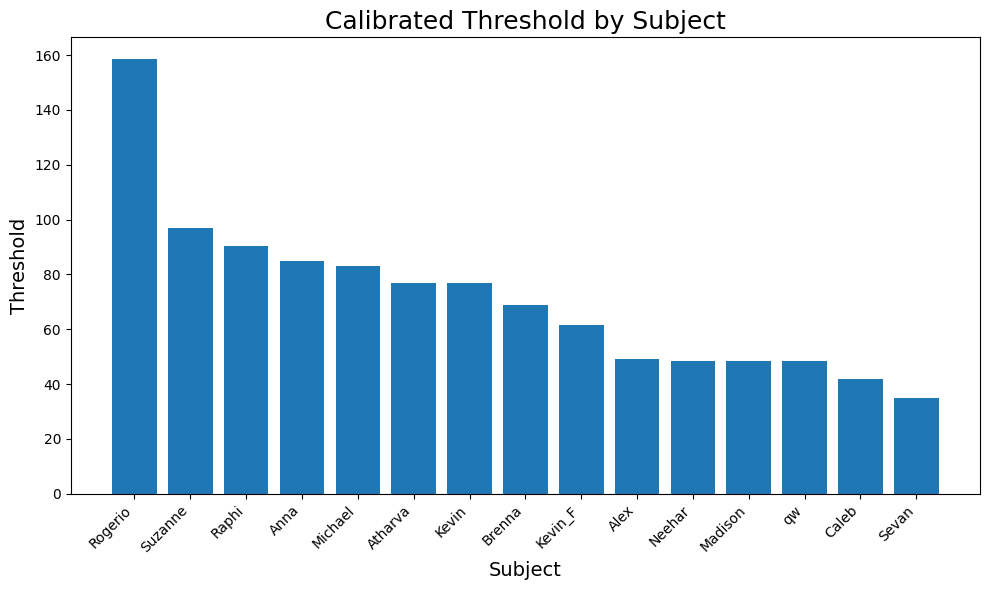

In [79]:
thresh = (
    df[~df['catch_trial']]
    .groupby('subj')['threshold']
    .mean()
    .reset_index(name='thresh')
)

df_sorted = thresh.sort_values('thresh', ascending=False)
    
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['subj'], df_sorted['thresh'])
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Threshold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Calibrated Threshold by Subject', fontsize=18)
plt.tight_layout()
plt.show()

## Confidences

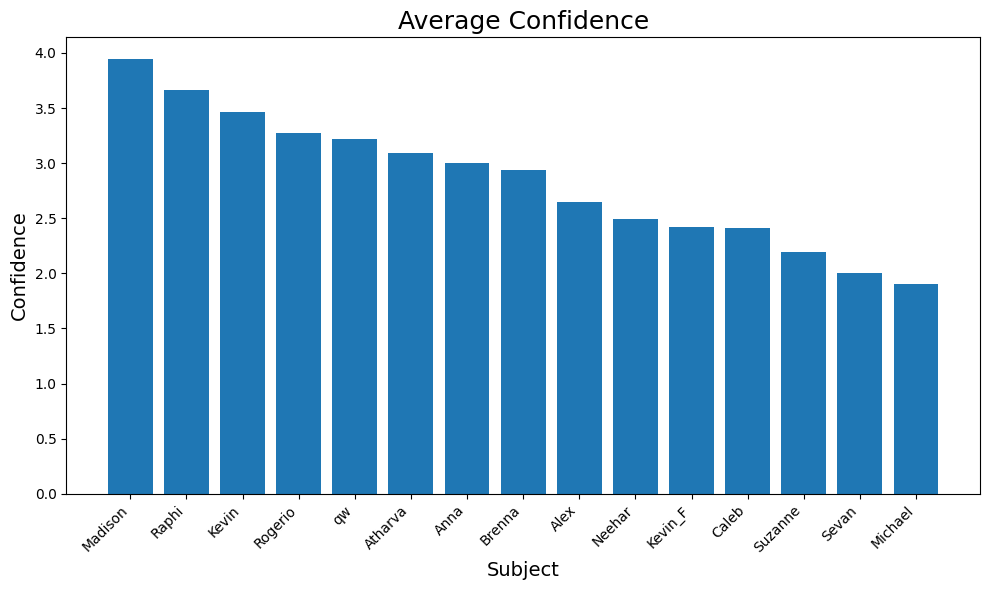

In [110]:
conf = (
    df
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

df_sorted = conf.sort_values('conf', ascending=False)
    
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['subj'], df_sorted['conf'])
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.title('Average Confidence', fontsize=18)
plt.tight_layout()
plt.show()

In [111]:
subjects = df_sorted['subj'].tolist()

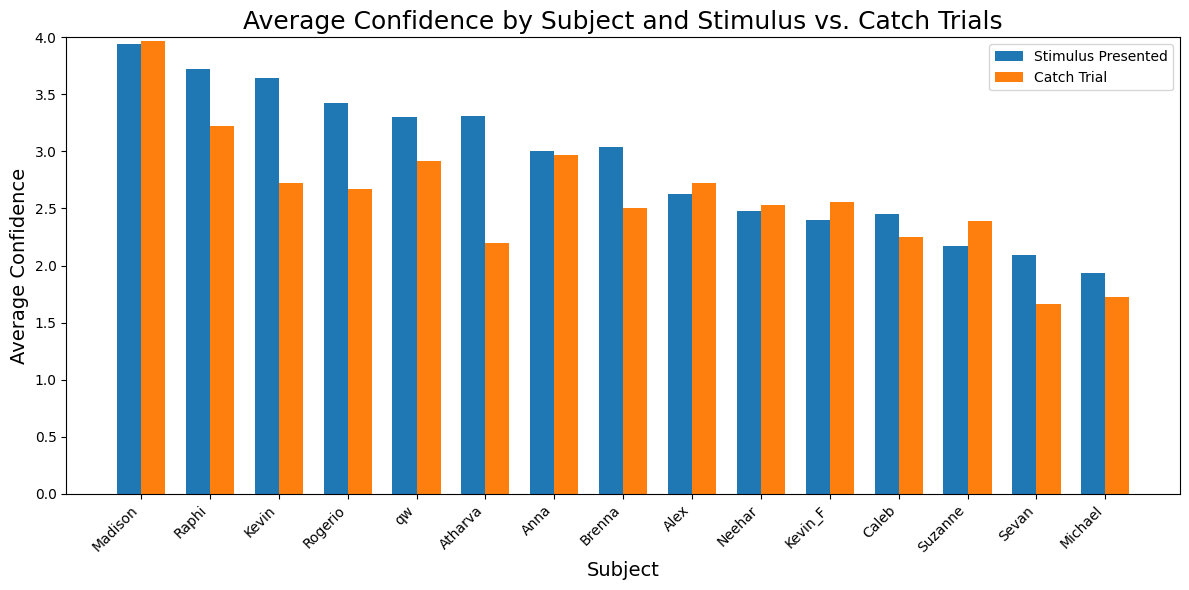

In [122]:
conf_reported = (
    df[~df['catch_trial']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

conf_not_reported = (
    df[df['catch_trial']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

# 2) Reindex to fixed order
conf_rep_ord = (
    conf_reported.set_index('subj')
                  .reindex(subjects)
                  .reset_index()
)
conf_not_rep_ord = (
    conf_not_reported.set_index('subj')
                     .reindex(subjects)
                     .reset_index()
)

# 3) Prepare bar positions
x = np.arange(len(subjects))
width = 0.35  # width of each bar

# 4) Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, conf_rep_ord['conf'], width, label='Stimulus Presented')
ax.bar(x + width/2, conf_not_rep_ord['conf'], width, label='Catch Trial')

# 5) Labels, ticks, legend, and limits
ax.set_xlabel('Subject', fontsize=14)
ax.set_ylabel('Average Confidence', fontsize=14)
ax.set_title('Average Confidence by Subject and Stimulus vs. Catch Trials', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45, ha='right')
ax.set_ylim(0, 4.0)
ax.legend()

plt.tight_layout()
plt.show()

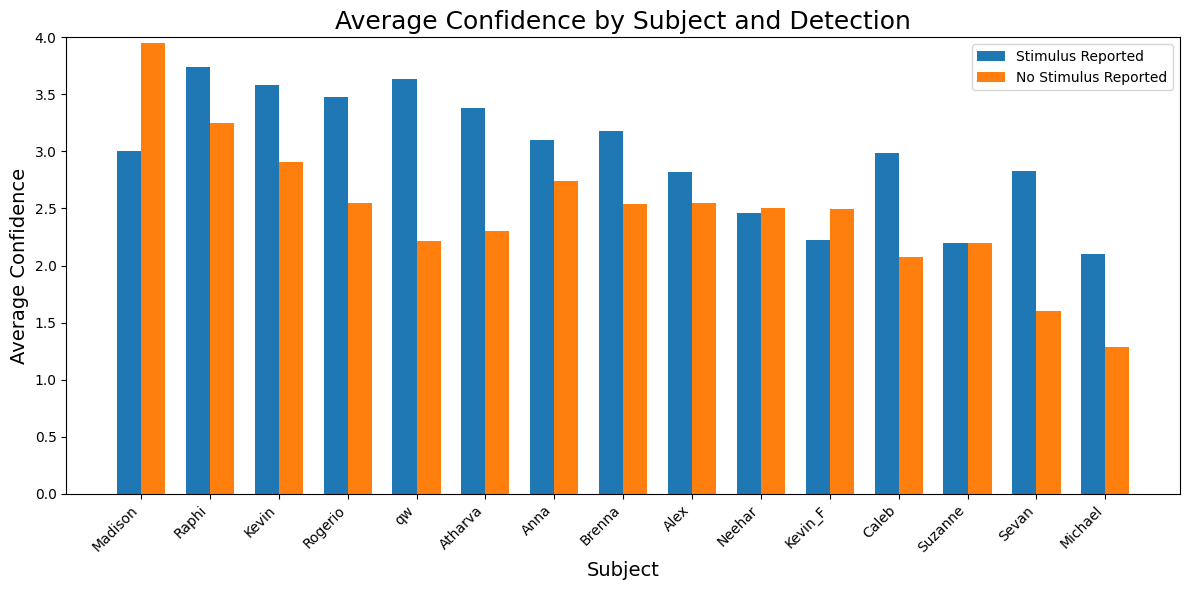

In [120]:
conf_reported = (
    df[df['detect_yn']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

conf_not_reported = (
    df[~df['detect_yn']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

# 2) Reindex to fixed order
conf_rep_ord = (
    conf_reported.set_index('subj')
                  .reindex(subjects)
                  .reset_index()
)
conf_not_rep_ord = (
    conf_not_reported.set_index('subj')
                     .reindex(subjects)
                     .reset_index()
)

# 3) Prepare bar positions
x = np.arange(len(subjects))
width = 0.35  # width of each bar

# 4) Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, conf_rep_ord['conf'], width, label='Stimulus Reported')
ax.bar(x + width/2, conf_not_rep_ord['conf'], width, label='No Stimulus Reported')

# 5) Labels, ticks, legend, and limits
ax.set_xlabel('Subject', fontsize=14)
ax.set_ylabel('Average Confidence', fontsize=14)
ax.set_title('Average Confidence by Subject and Detection', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45, ha='right')
ax.set_ylim(0, 4.0)
ax.legend()

plt.tight_layout()
plt.show()

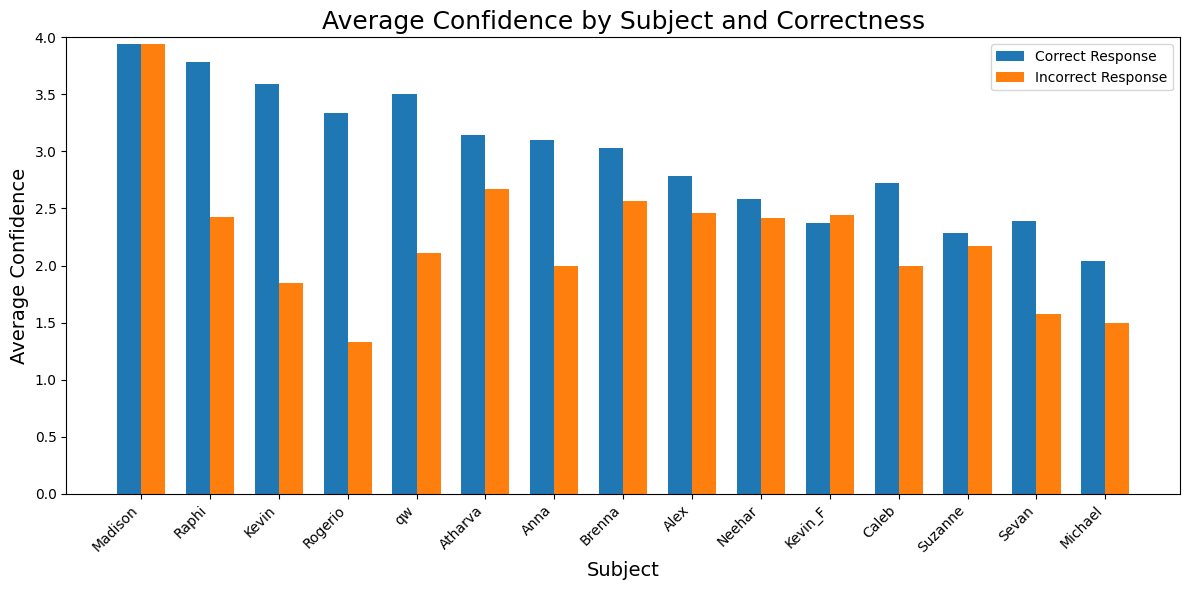

In [123]:
conf_reported = (
    df[df['detect_yn'] != df['catch_trial']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

conf_not_reported = (
    df[df['detect_yn'] == df['catch_trial']]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

# 2) Reindex to fixed order
conf_rep_ord = (
    conf_reported.set_index('subj')
                  .reindex(subjects)
                  .reset_index()
)
conf_not_rep_ord = (
    conf_not_reported.set_index('subj')
                     .reindex(subjects)
                     .reset_index()
)

# 3) Prepare bar positions
x = np.arange(len(subjects))
width = 0.35  # width of each bar

# 4) Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, conf_rep_ord['conf'], width, label='Correct Response')
ax.bar(x + width/2, conf_not_rep_ord['conf'], width, label='Incorrect Response')

# 5) Labels, ticks, legend, and limits
ax.set_xlabel('Subject', fontsize=14)
ax.set_ylabel('Average Confidence', fontsize=14)
ax.set_title('Average Confidence by Subject and Correctness', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45, ha='right')
ax.set_ylim(0, 4.0)
ax.legend()

plt.tight_layout()
plt.show()

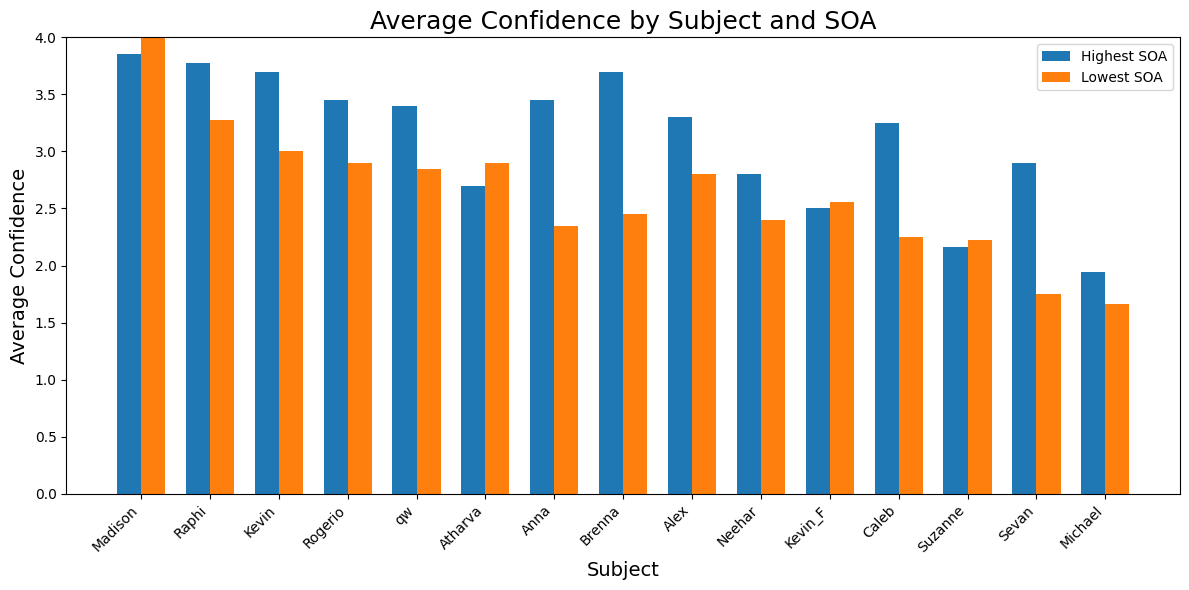

In [124]:
conf_reported = (
    df[df['soa_offset'] == 4]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

conf_not_reported = (
    df[df['soa_offset'] == -4]
    .groupby('subj')['confidence']
    .mean()
    .reset_index(name='conf')
)

# 2) Reindex to fixed order
conf_rep_ord = (
    conf_reported.set_index('subj')
                  .reindex(subjects)
                  .reset_index()
)
conf_not_rep_ord = (
    conf_not_reported.set_index('subj')
                     .reindex(subjects)
                     .reset_index()
)

# 3) Prepare bar positions
x = np.arange(len(subjects))
width = 0.35  # width of each bar

# 4) Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, conf_rep_ord['conf'], width, label='Highest SOA')
ax.bar(x + width/2, conf_not_rep_ord['conf'], width, label='Lowest SOA')

# 5) Labels, ticks, legend, and limits
ax.set_xlabel('Subject', fontsize=14)
ax.set_ylabel('Average Confidence', fontsize=14)
ax.set_title('Average Confidence by Subject and SOA', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(subjects, rotation=45, ha='right')
ax.set_ylim(0, 4.0)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
["Alex", "Kevin_F", "Brenna", "Caleb", "Sevan"]

In [54]:
df = pd.read_csv(r"data\Sevan_001_2025-05-23_11-38.csv")

In [6]:
df['soa_ms'] = df['soa_ms'].round()

In [7]:
np.sort(df['soa_ms'].unique())

array([21., 28., 35., 42., 49., 56., 62., 69., 76.])

In [55]:
for soa in np.sort(df['soa_ms'].unique()):
    print("SOA:", soa, "\tDetections:", df[(df['soa_ms'] == soa) & (~df['catch_trial'])]['detect_yn'].sum(), "\tConfidence:", df[df['soa_ms'] == soa]['confidence'].mean())

SOA: 6.91792587391459 	Detections: 0 	Confidence: 1.75
SOA: 13.83585174782918 	Detections: 0 	Confidence: 1.5
SOA: 20.75377762174377 	Detections: 0 	Confidence: 1.5
SOA: 27.67170349565836 	Detections: 1 	Confidence: 1.65
SOA: 34.58962936957295 	Detections: 9 	Confidence: 1.95
SOA: 41.50755524348754 	Detections: 10 	Confidence: 1.9
SOA: 48.42548111740213 	Detections: 10 	Confidence: 2.15
SOA: 55.34340699131672 	Detections: 13 	Confidence: 2.75
SOA: 62.26133286523131 	Detections: 16 	Confidence: 2.9


In [26]:
df['detect_yn'].sum() / len(df)

0.005555555555555556

Okay so can you break it down again in greater detail - I understand Bayes formula but I don't understand how we are calculating everything. So we have some hyperparameters which give an analytical calculation of our curve, and so we can calculate the likelihood in closed form. We also have our prior distribution over those hyperparameters, which is calculated by our hyperpriors to begin, but I don't quite understand how the hyperpriors are updated. I guess that's actually the whole point though, that's the curve fitting process which is an optimization procedure to find the prior distributions which maximizes the posterior. But we can't calculate the posterior in closed form since we don't have p(data) but we can get around this with monte carlo sampoling - could you give a high level view of how that works? 

In [27]:
df[~df['detect_yn']]['confidence'].mean() / 4.0

0.9874301675977654

In [28]:
len(df)

180

In [56]:
df[df['catch_trial']]

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,threshold
2,Sevan,2,55.343407,True,False,2,35.0
12,Sevan,12,20.753778,True,False,2,35.0
13,Sevan,13,27.671703,True,False,2,35.0
14,Sevan,14,20.753778,True,False,1,35.0
21,Sevan,21,34.589629,True,False,2,35.0
28,Sevan,28,20.753778,True,False,1,35.0
29,Sevan,29,34.589629,True,False,2,35.0
38,Sevan,38,34.589629,True,False,2,35.0
42,Sevan,42,6.917926,True,False,2,35.0
45,Sevan,45,48.425481,True,False,2,35.0


In [18]:
df[80:]['detect_yn'].sum() / 82

0.7195121951219512

In [217]:
df_clean = df[(df['rt_prime_ms'] < 800) & (df['rt_prime_ms'] > 50)]

In [222]:
df_clean[df_clean['prime_congruent'] & ~df_clean['detect_yn'] & ~df_clean['catch_trial'] & df_clean['prime_shown']]['rt_prime_ms'].mean()

331.96543044734585

In [223]:
df_clean[~df_clean['prime_congruent'] & ~df_clean['detect_yn'] & ~df_clean['catch_trial'] & df_clean['prime_shown']]['rt_prime_ms'].mean()

319.43564635996773

In [70]:
df[(df['soa_ms'] == 155) & (df['catch_trial']==True)]

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,rt_prime_ms,prime_shown,prime_congruent,prime_correct,threshold
0,Sevan,0,155.0,True,False,20,998.9581,True,False,False,154.632468
6,Sevan,6,155.0,True,False,40,681.7258,True,False,False,154.632468
16,Sevan,16,155.0,True,False,50,1051.9180,True,False,False,154.632468
27,Sevan,27,155.0,True,False,90,10645.6353,True,False,False,154.632468
29,Sevan,29,155.0,True,False,40,721.5351,True,False,True,154.632468
50,Sevan,50,155.0,True,False,60,424.9135,True,False,True,154.632468
51,Sevan,51,155.0,True,True,50,1154.3335,True,False,True,154.632468
55,Sevan,55,155.0,True,False,80,1476.3202,True,False,True,154.632468
76,Sevan,76,155.0,True,True,30,408.5268,True,False,False,154.632468
91,Sevan,91,155.0,True,False,70,482.7999,True,False,True,154.632468


In [78]:
df[~df['prime_shown']]

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,rt_prime_ms,prime_shown,prime_congruent,prime_correct,threshold
11,Sevan,11,155.0,False,True,90,384.6153,False,False,NaN,154.632468
20,Sevan,20,155.0,False,True,70,331.9550,False,False,NaN,154.632468
28,Sevan,28,155.0,False,False,40,26065.4760,False,False,NaN,154.632468
39,Sevan,39,155.0,False,True,60,3060.0457,False,False,NaN,154.632468
46,Sevan,46,155.0,False,True,50,752.2775,False,False,NaN,154.632468
52,Sevan,52,155.0,False,True,100,399.6792,False,False,NaN,154.632468
61,Sevan,61,155.0,False,True,100,425.6216,False,False,NaN,154.632468
69,Sevan,69,155.0,False,True,60,341.8765,False,False,NaN,154.632468
80,Sevan,80,155.0,False,False,40,385.9284,False,False,NaN,154.632468
107,Sevan,107,155.0,False,False,80,292.0796,False,False,NaN,154.632468


In [80]:
max(1, int(round(10**0.84)))*7

49

In [63]:
df[df['soa_ms'] == 205]['detect_yn'].sum()

9

In [47]:
df[df['prime_congruent'] & ~df['detect_yn'] & (df['rt_prime_ms']<1000)]['rt_prime_ms'].mean()

565.1493363759735

In [48]:
df[~df['prime_congruent'] & ~df['detect_yn'] & (df['rt_prime_ms']<1000)]['rt_prime_ms'].mean()

538.9123675916848

In [99]:
FRAME_MS = 6.943

In [110]:
scale = np.array([0.25, 0.45, 0.65, 0.85, 1.0, 1.15, 1.35, 1.60, 2.0])
thresh = 9 * FRAME_MS

In [111]:
np.round(np.clip(np.round(thresh * scale), 1, None).astype(int) / FRAME_MS)

array([ 2.,  4.,  6.,  8.,  9., 10., 12., 14., 18.])

In [90]:
np.round(scale * thresh)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10.])

In [191]:
guesses = np.array([True, True, False, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, True, True])

In [192]:
guesses.sum() / len(guesses)

0.6785714285714286

In [245]:
df.columns = ['trial', 'soa_ms', 'catch_trial', 'detect_yn', 'confidence', 'rt', 'threshold']

In [ ]:
['subj', 'trial', 'soa_ms', 'catch_trial', 'detect_yn', 'confidence', 'threshold']

In [259]:
df

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,threshold
0,TEST,0,104.0,False,True,4,90.221009
1,TEST,1,69.0,False,True,4,90.221009
2,TEST,2,76.0,False,True,4,90.221009
3,TEST,3,97.0,False,True,4,90.221009
4,TEST,4,104.0,False,True,4,90.221009
5,TEST,5,118.0,False,True,4,90.221009
6,TEST,6,76.0,False,True,4,90.221009
7,TEST,7,90.0,False,True,4,90.221009
8,TEST,8,118.0,False,True,4,90.221009
9,TEST,9,62.0,False,True,4,90.221009


In [51]:
df.head()

,subj,trial,soa_ms,catch_trial,detect_yn,confidence,threshold
0,Michael,0,76.289654,False,False,1,83.225077
1,Michael,1,97.095923,False,True,4,83.225077
2,Michael,2,55.483385,False,True,3,83.225077
3,Michael,3,104.031346,False,True,4,83.225077
4,Michael,4,69.354231,True,True,2,83.225077


In [52]:
import matplotlib.pyplot as plt

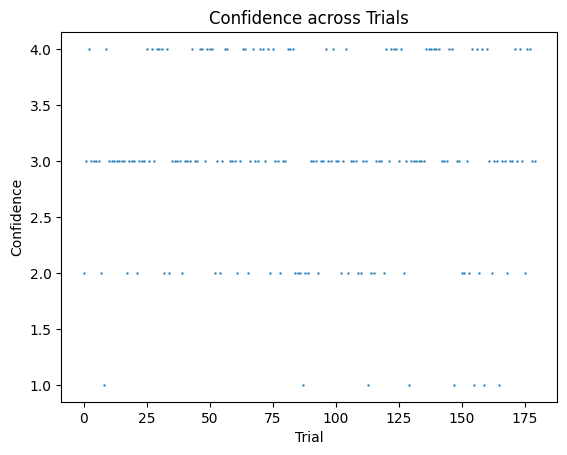

In [64]:
plt.figure()
plt.scatter(df['trial'], df['confidence'], s=0.75, alpha=0.75)
plt.xlabel('Trial')
plt.ylabel('Confidence')
plt.title('Confidence across Trials')
plt.show()